In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

import contractions
import nltk
from nltk.text import Text
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import spacy

import re 

In [2]:
df = pd.read_csv('washington_normal_2020.csv')

In [3]:
df

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/TeeJ_Apple/status/13447910...,2020-12-31 23:42:28+00:00,well lost weight ate healthy fail though came ...,well lost weight ate healthy fail though came ...,1344791061986762753,https://twitter.com/TeeJ_Apple,1,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/MattyCj22/status/134478368...,2020-12-31 23:13:10+00:00,covid took legend rest power,covid took legend rest power,1344783686659678210,https://twitter.com/MattyCj22,0,0,1,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/aikers99/status/1344779663...,2020-12-31 22:57:11+00:00,realdonaldtrump december country plunged would...,realdonaldtrump december country plunged would...,1344779663852367873,https://twitter.com/aikers99,0,0,0,0,...,1.344718e+18,https://twitter.com/realDonaldTrump,"[User(username='realDonaldTrump', id=25073877,...","Coordinates(longitude=-77.335163, latitude=38....","Place(id='e4aee3ab11ef52a6', fullName='Fairfax...",NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/noramurray/status/13447759...,2020-12-31 22:42:31+00:00,seems hard celebrate ending difficult year peo...,seems hard celebrate ending difficult year peo...,1344775974668423168,https://twitter.com/noramurray,0,0,3,0,...,NaN,NaN,NaN,"Coordinates(longitude=-79.487651, latitude=37....","Place(id='dea1eac2d7ef8878', fullName='Marylan...",NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/laurvanhasselt/status/1344...,2020-12-31 22:36:59+00:00,lmfaoooo covid b like,lmfaoooo covid b like,1344774581995896837,https://twitter.com/laurvanhasselt,1,0,0,0,...,1.344771e+18,https://twitter.com/ChillWill63,"[User(username='ChillWill63', id=2919643282, d...","Coordinates(longitude=-79.487651, latitude=37....","Place(id='dea1eac2d7ef8878', fullName='Marylan...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24726,https://twitter.com/HolmesCarolyn23/status/126...,2020-06-01 02:12:58+00:00,coronavirus may blood vessel disease explains ...,coronavirus may blood vessel disease explains ...,1267277933841993728,https://twitter.com/HolmesCarolyn23,0,0,0,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
24727,https://twitter.com/HajjiADavis/status/1267263...,2020-06-01 01:16:20+00:00,realdonaldtrump american dead life purposefull...,realdonaldtrump american dead life purposefull...,1267263677943742464,https://twitter.com/HajjiADavis,0,0,0,0,...,NaN,NaN,"[User(username='realDonaldTrump', id=25073877,...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
24728,https://twitter.com/HajjiADavis/status/1267263...,2020-06-01 01:15:41+00:00,realdonaldtrump american dead life purposefull...,realdonaldtrump american dead life purposefull...,1267263514399444992,https://twitter.com/HajjiADavis,0,0,0,0,...,1.267247e+18,https://twitter.com/realDonaldTrump,"[User(username='realDonaldTrump', id=25073877,...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
24729,https://twitter.com/B1ackBruceWayne/status/126...,2020-06-01 01:05:56+00:00,serious note second wave coronavirus going hit...,serious note second wave coronavirus going hit...,1267261062665179136,https://twitter.com/B1ackBruceWayne,2,0,3,0,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

url                     0
date                    0
rawContent             18
renderedContent        18
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
links               18497
media               21394
retweetedTweet      24731
quotedTweet         20806
inReplyToTweetId    17959
inReplyToUser       17959
mentionedUsers      13945
coordinates             5
place                   0
hashtags            18498
cashtags            24716
card                22138
viewCount           24731
vibe                24731
dtype: int64

In [5]:
df['rawContent'].fillna('', inplace=True)
df['renderedContent'].fillna('', inplace=True)

In [6]:
## remove specific word HTTP
df['rawContent'] = df['rawContent'].str.replace('covid', '')
df['rawContent'] = df['rawContent'].str.replace('coronavirus', '')

df['renderedContent'] = df['renderedContent'].str.replace('covid', '')
df['renderedContent'] = df['renderedContent'].str.replace('coronavirus', '')

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

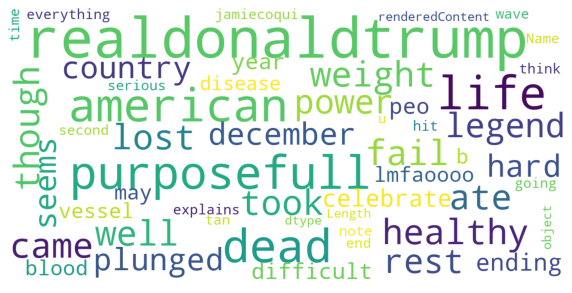

In [8]:
show_wordcloud(df["renderedContent"])

In [9]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [10]:
data = df['renderedContent'].values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['well', 'lost', 'weight', 'ate', 'healthy', 'fail', 'though', 'came', 'budgeting', 'kind', 'ruined', 'india', 'honest', 'would', 'say', 'healthy', 'every', 'aspect', 'life']


## Building Bi-gram and Tri-gram Models

In [11]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [12]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_bigrams = make_bigrams(data_words)
data_words_bigrams

[['well',
  'lost',
  'weight',
  'ate',
  'healthy',
  'fail',
  'though',
  'came',
  'budgeting',
  'kind',
  'ruined',
  'india',
  'honest',
  'would',
  'say',
  'healthy',
  'every',
  'aspect',
  'life'],
 ['took', 'legend', 'rest', 'power'],
 ['realdonaldtrump',
  'december',
  'country',
  'plunged',
  'would',
  'become',
  'toughest',
  'battle',
  'even',
  'vaccine',
  'started',
  'go',
  'reported',
  'million',
  'new',
  'infection',
  'death',
  'according',
  'data',
  'compiled',
  'john_hopkins',
  'university'],
 ['seems',
  'hard',
  'celebrate',
  'ending',
  'difficult',
  'year',
  'people',
  'still',
  'dying',
  'around',
  'vaccine',
  'hope',
  'better',
  'end_sight',
  'wishing',
  'safe',
  'healthy',
  'make',
  'best',
  'family',
  'first'],
 ['lmfaoooo', 'like'],
 ['december',
  'black',
  'woman',
  'named',
  'susan_moore',
  'died',
  'white',
  'doctor',
  'named',
  'eric',
  'bannec',
  'indiana',
  'university',
  'health',
  'north',
  'ho

In [14]:
data_words_trigrams = make_trigrams(data_words)
data_words_trigrams

[['well',
  'lost',
  'weight',
  'ate',
  'healthy',
  'fail',
  'though',
  'came',
  'budgeting',
  'kind',
  'ruined',
  'india',
  'honest',
  'would',
  'say',
  'healthy',
  'every',
  'aspect',
  'life'],
 ['took', 'legend', 'rest', 'power'],
 ['realdonaldtrump',
  'december',
  'country',
  'plunged',
  'would',
  'become',
  'toughest',
  'battle',
  'even',
  'vaccine',
  'started',
  'go',
  'reported',
  'million',
  'new',
  'infection',
  'death',
  'according',
  'data',
  'compiled',
  'john_hopkins_university'],
 ['seems',
  'hard',
  'celebrate',
  'ending',
  'difficult',
  'year',
  'people',
  'still',
  'dying',
  'around',
  'vaccine',
  'hope',
  'better',
  'end_sight',
  'wishing',
  'safe',
  'healthy',
  'make',
  'best',
  'family',
  'first'],
 ['lmfaoooo', 'like'],
 ['december',
  'black',
  'woman',
  'named',
  'susan_moore',
  'died',
  'white',
  'doctor',
  'named',
  'eric',
  'bannec',
  'indiana',
  'university',
  'health',
  'north',
  'hospita

## Building rough LDA model 

In [15]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


In [16]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.013*"protest" + 0.009*"time" + 0.007*"dc" + 0.006*"rally" + 0.006*"child" '
  '+ 0.005*"amp" + 0.005*"racism" + 0.005*"life" + 0.005*"black" + '
  '0.004*"safe"'),
 (1,
  '0.014*"get" + 0.011*"test" + 0.009*"like" + 0.009*"people" + 0.008*"would" '
  '+ 0.007*"going" + 0.007*"got" + 0.007*"one" + 0.007*"back" + 0.007*"go"'),
 (2,
  '0.019*"amp" + 0.012*"people" + 0.008*"pandemic" + 0.006*"community" + '
  '0.005*"flu" + 0.005*"black" + 0.004*"business" + 0.004*"like" + '
  '0.004*"across" + 0.004*"need"'),
 (3,
  '0.028*"case" + 0.020*"new" + 0.019*"vaccine" + 0.017*"death" + '
  '0.010*"state" + 0.007*"day" + 0.006*"amp" + 0.006*"pandemic" + '
  '0.005*"update" + 0.005*"usa"'),
 (4,
  '0.036*"trump" + 0.014*"realdonaldtrump" + 0.013*"people" + 0.012*"pandemic" '
  '+ 0.011*"american" + 0.009*"president" + 0.006*"like" + 0.006*"say" + '
  '0.006*"donald" + 0.005*"amp"')]


In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3240230448123007


## Tuning based on number of topics

In [19]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
       
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
    
    # Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
# Can take a long time to run. In this case we are going to k_max=14.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

coherence_scores = []
model_topics = []

for k in range(2, 20):
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word,k=k) 
    model_topics.append(k)    
    coherence_scores.append(cv)    
    print("#Topics: " + str(k) + ", Score: " + str(coherence_scores[-1]))

print(datetime.datetime.now())

2023-03-12 03:19:49.489997
#Topics: 2, Score: 0.20955931581587156
#Topics: 3, Score: 0.28726207817090504
#Topics: 4, Score: 0.28410802687373193
#Topics: 5, Score: 0.35737058843361363
#Topics: 6, Score: 0.35678871946792645
#Topics: 7, Score: 0.3416640580286798
#Topics: 8, Score: 0.3710691852046205
#Topics: 9, Score: 0.37219844379987177
#Topics: 10, Score: 0.38473188871941544
#Topics: 11, Score: 0.3762851043409874
#Topics: 12, Score: 0.3378310615818909
#Topics: 13, Score: 0.35442796814091226
#Topics: 14, Score: 0.3402034479478137
#Topics: 15, Score: 0.3535354024804895
#Topics: 16, Score: 0.34598468214577305
#Topics: 17, Score: 0.384649797677715
#Topics: 18, Score: 0.35051716035667135
#Topics: 19, Score: 0.36322116852953
2023-03-12 03:41:58.955951


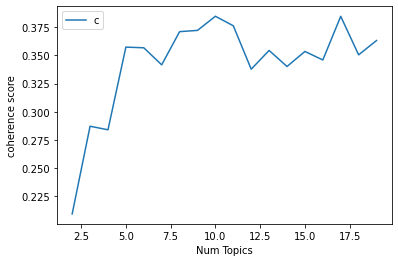

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("coherence score")
plt.legend(("coherence score"), loc='best')
plt.show()

In [22]:
end here

SyntaxError: invalid syntax (<ipython-input-22-9bcc9ab561c7>, line 1)

### Final Model

In [23]:
num_topics = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10)

In [24]:
score = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
score.get_coherence()

0.35722977328924815

In [25]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./lda_model/washington_normal_2020_lda_vis_tuned_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './lda_vis/washington_normal_2020_lda_vis_tuned_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.199620  0.012173       1        1  21.655185
1      0.223332  0.040949       2        1  18.596838
7      0.109204  0.028212       3        1  10.934987
8      0.113681  0.002520       4        1   9.951334
0     -0.136132  0.215058       5        1   7.915920
5      0.062723 -0.060063       6        1   7.754209
3     -0.196508  0.215707       7        1   6.115931
2     -0.093008 -0.099421       8        1   6.027588
4     -0.101832 -0.164866       9        1   5.960117
9     -0.181078 -0.190269      10        1   5.087891, topic_info=       Term         Freq        Total Category  logprob  loglift
512    case  1633.000000  1633.000000  Default  30.0000  30.0000
35      new  1356.000000  1356.000000  Default  29.0000  29.0000
28    death  1363.000000  1363.000000  Default  28.0000  28.0000
156   trump  3389.000000  3389.000000  Default  27.0000  27.0000
171     amp  2467.000000  2467.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1080    gop   127.722798   320.916200  Topic10  -4.8637   2.0570
1821   july    92.361038   160.427773  Topic10  -5.1879   2.4262
1713    pay    87.025964   146.379054  Topic10  -5.2474   2.4583
105    vote    97.757531   393.880436  Topic10  -5.1311   1.5847
3717    aid    67.377015   104.811574  Topic10  -5.5033   2.5364

[603 rows x 6 columns], token_table=       Topic      Freq                     Term
term                                           
22         7  0.774855                according
22         8  0.212872                according
2384       6  0.978812                  account
2654       5  0.995725                   across
579        1  0.880854           administration
...      ...       ...                      ...
17         6  0.015699                    would
24978      7  0.991961  wrecked_stole_make_hell
1530       2  0.988482                     yeah
189        6  0.158591                    young
189        8  0.828198                    young

[1109 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 8, 9, 1, 6, 4, 3, 5, 10])